# Quantifying quantum chaos using OTOC oscillation

How to construct mixed field Ising model dynamics and extract chaos features.

In [1]:
from otoc import OTOC
import matplotlib.pyplot as plt
import numpy as np

We consider the following Hamiltonian:

$H = -J \sum_i \sigma_i^z \sigma_{i+1}^z + h_x\sum_i \sigma_i^x  + h_z \sum_i \sigma_i^z $

In the inifinite temperature limit, the OTOC for the spin chain is given by: 

$C^{\mu\nu}_{ij}(t) = \frac{1}{2}<[\sigma^{\mu}_i(t),\sigma^{\nu}_j]^2> = 1-Re\{Tr[\sigma^{\mu}_i(t)\sigma^{\nu}_j\sigma^{\mu}_i(t)\sigma^{\nu}_j]\}/D$,

where $D$ is the dimension of the Hilbert space. Here's an example of what they look like:

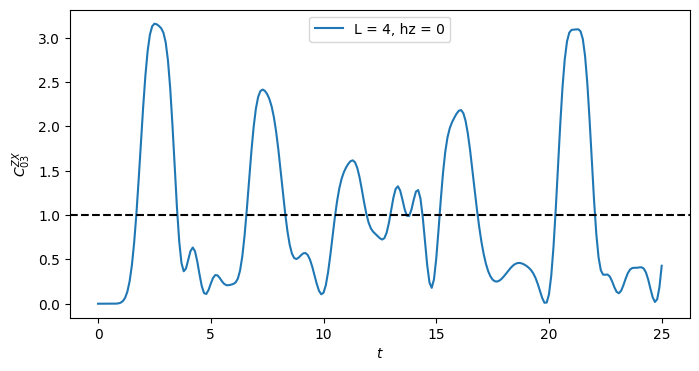

In [7]:
# How to initialize the class and get OTOC list
otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='Z', nu='X', i=0, j=3, T=25, tstep=0.1, Dt=40, init_state=0)
otoc.analysis()
otoc.plot_otoc()

The amplitude of the oscillation provides a way to probe how chaotic the quantum system is. The chaos measure $\chi$ is defined as follows: 

$\chi = \frac{\sigma^{-1}-\sigma^{-1}_{min}}{\sigma^{-1}_{max}-\sigma^{-1}_{min}}$ 

$\chi \rightarrow 0$ is the integrable limit and $\chi \rightarrow 1$ is the chaotic limit.

$\sigma = \sqrt{<c(t)^2>-1}$ of the renormalized OTOC $c(t) = C(t)/<C(t)>$, with the brackets standing for time-average over a time window $\Delta t$.

## 1. $h_z$ dependence

In [4]:
tstep = 0.1
hz_max = 2.5
hz_step = 0.1
dt_min = 10
dt_max = 25

dtlist = np.arange(dt_min, dt_max,5)
hzlist = np.arange(0,hz_max,hz_step)
chilist = np.zeros((len(dtlist),len(hzlist)))
stdlist = np.zeros(len(hzlist))

for l,Dt in enumerate(dtlist):
    t_end = Dt + 5

    for k, hz in enumerate(hzlist):

        otoc = OTOC.init(L=4, J=20, hz=hz, hx=1, mu='X', nu='Z', i=0, j=3, T=t_end, tstep=tstep, Dt=Dt, init_state="thermal", state_param=1000)
        otoc.analysis()
        stdlist[k] = otoc.std

    std_inv = 1/stdlist
    chilist[l] = (std_inv - np.min(std_inv))/(np.max(std_inv)-np.min(std_inv))

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2708518/989165213.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(C^{zx}_{0,3}) $')


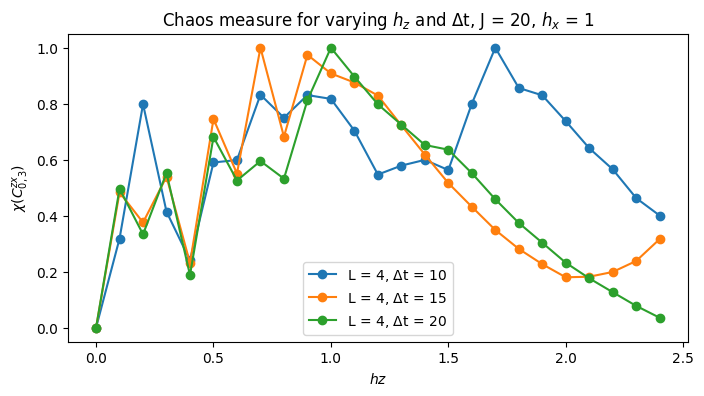

In [5]:
# Integrable limit: 𝜒 -> 0; Chaos limit: 𝜒 -> 1
plt.figure(figsize=(8,4))
for l, Dt in enumerate(dtlist):
    plt.plot(hzlist,chilist[l], "-o", label = rf'L = {otoc.mfim.L}, $\Delta$t = {Dt}')
plt.xlabel('$hz$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for varying $h_z$ and $\Delta$t, J = {otoc.mfim.J}, $h_x$ = {otoc.mfim.hx}")
plt.legend()

There also seems to be a significant $\Delta t$ dependence, but we are interested in the long time limit.

## 2. Initial state dependence

### Thermal state at $T_0$:

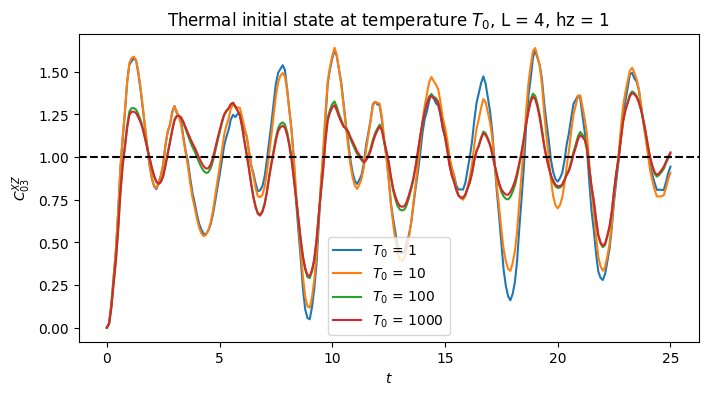

In [5]:
temp_list = [1,10,100,1000]

plt.figure(figsize=(8,4))

for temp in temp_list:
    otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="thermal", state_param=temp)
    otoc.analysis()
    plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.state_param}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"Thermal initial state at temperature $T_0$, L = {otoc.mfim.L}, hz = {otoc.mfim.hz}")
plt.legend()
plt.show()


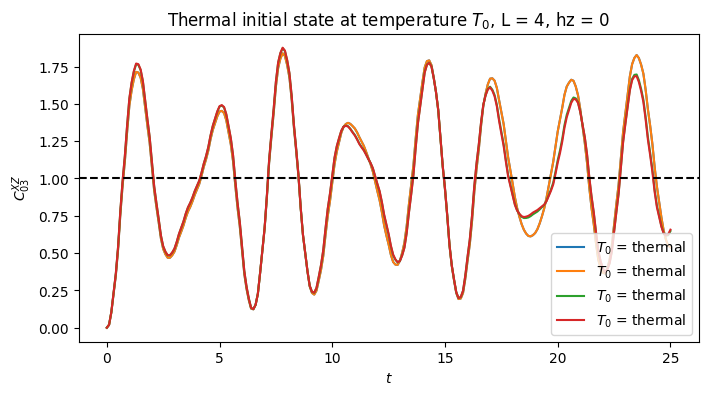

In [6]:
temp_list = [1,10,100,1000]

plt.figure(figsize=(8,4))

for temp in temp_list:
    otoc = OTOC.init(L=4, J=20, hz=0, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="thermal", state_param=temp)
    otoc.analysis()
    plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.init_state}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"Thermal initial state at temperature $T_0$, L = {otoc.mfim.L}, hz = {otoc.mfim.hz}")
plt.legend()
plt.show()


### Looks like the initial state dependence only becomes important in the more chaotic regime. Lower temperature $\rightarrow$ more integrable. Now extract $\chi$ for varying initial temperature:

In [7]:
templist = np.logspace(0,3,num=4)
hzlist = np.arange(0,2.5,0.1)
stdlist = np.zeros((len(templist),len(hzlist)))

for l,temp in enumerate(templist):

    for k, hz in enumerate(hzlist):

        otoc = OTOC.init(L=4, J=20, hz=hz, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="thermal", state_param=temp)
        otoc.analysis()
        stdlist[l][k] = otoc.std


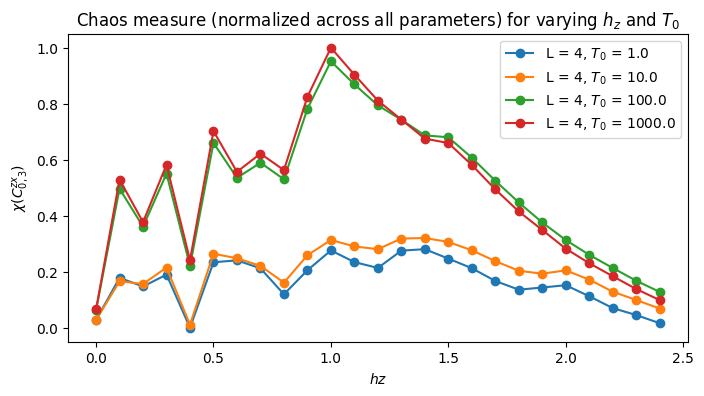

In [8]:
# Integrable limit: 𝜒 -> 0; Chaos limit: 𝜒 -> 1
std_inv = 1/stdlist

plt.figure(figsize=(8,4))
for l, temp in enumerate(templist):
    chilist = (std_inv[l] - np.min(std_inv))/(np.max(std_inv)-np.min(std_inv))
    plt.plot(hzlist,chilist, "-o", label = rf'L = {otoc.mfim.L}, $T_0$ = {temp}')
plt.xlabel('$hz$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure (normalized across all parameters) for varying $h_z$ and $T_0$")
plt.legend()

### The integrable $\rightarrow$ nonintegrable transition happens between $T_0 = 10$ and $T_0 = 100$:

In [9]:
templist = np.logspace(0,3,num=50)
stdlist = np.zeros(len(templist))

for l,temp in enumerate(templist):

    otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="thermal", state_param=temp)
    otoc.analysis()
    stdlist[l] = otoc.std

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


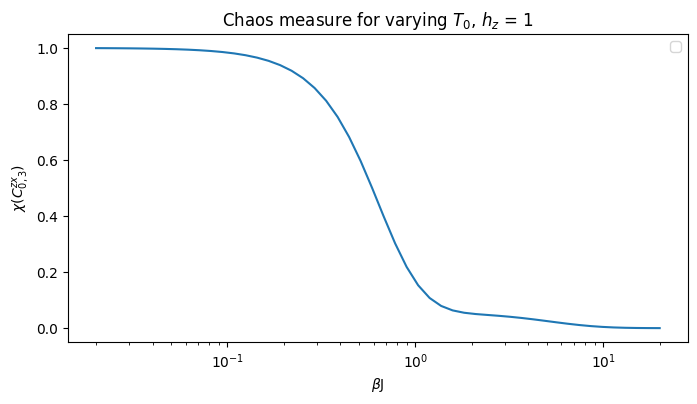

In [10]:
std_inv = 1/stdlist
chilist = (std_inv - np.min(std_inv))/(np.max(std_inv)-np.min(std_inv))

plt.figure(figsize=(8,4))
plt.plot(20/templist,chilist)
plt.xscale('log')
plt.xlabel(r'$\beta$J')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for varying $T_0$, $h_z$ = 1")
plt.legend()

My guess is that the relevant scale is βJ...

### Dependence on purity of the initial state

c:\Users\Huai\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
c:\Users\Huai\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


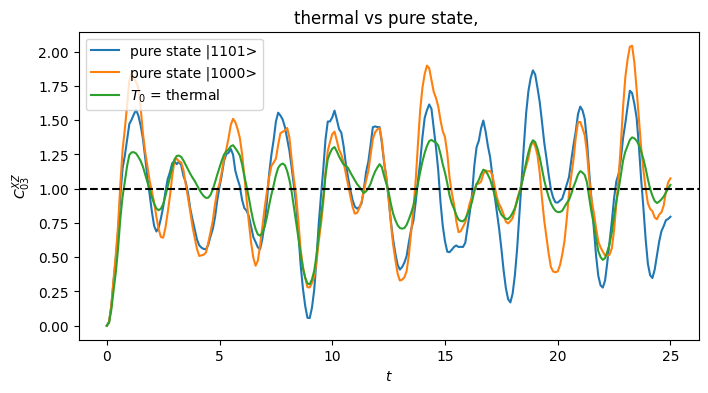

In [2]:
plt.figure(figsize=(8,4))

otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="pure", state_param=[[1],[[1,1,0,1]]])
otoc.analysis()
plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'pure state |1101>')

otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="pure", state_param=[[1],[[1,0,0,0]]])
otoc.analysis()
plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'pure state |1000>')

otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="thermal", state_param=1000)
otoc.analysis()
plt.plot(otoc.tlist,otoc.normalized_otoc_list, label = f'$T_0$ = {otoc.init_state}')

plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('$t$')
plt.ylabel(rf"$C^{{{otoc.mu}{otoc.nu}}}_{{{otoc.i}{otoc.j}}}$")
plt.title(f"thermal vs pure state, ")
plt.legend()
plt.show()

### Looks like pure state $\rightarrow$ integrable. Here we interpolate between a pure state ($\epsilon$) and a maximally mixed state (1-$\epsilon$) and extract chaos measure $\chi$ with respect to purity of the initial state Tr[$\rho(0)^2$]:

In [2]:
epsilon = np.linspace(0,1,20)
stdlist = np.zeros(len(epsilon))
plist = np.zeros(len(epsilon))

for i,e in enumerate(epsilon):

    otoc = OTOC.init(L=4, J=20, hz=1, hx=1, mu='X', nu='Z', i=0, j=3, T=25, tstep=0.1, Dt=20, init_state="mixed", state_param = e)
    otoc.analysis()
    stdlist[i] = otoc.std
    plist[i] = (otoc.rho**2).diagonal().sum()

c:\Users\Huai\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
c:\Users\Huai\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
C:\Users\Huai\AppData\Local\Temp\ipykernel_14728\1587353686.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  plist[i] = (otoc.rho**2).diagonal().sum()


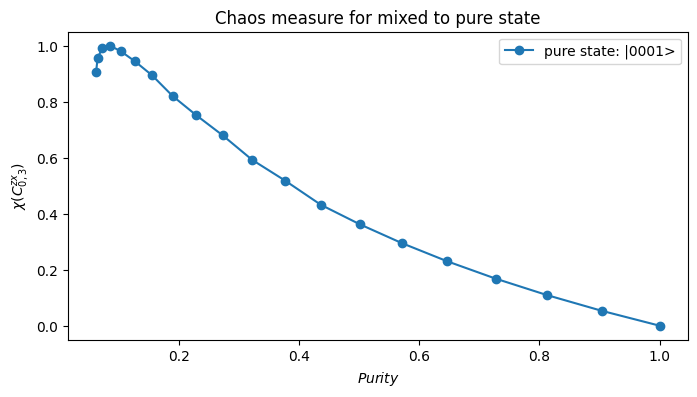

In [3]:
std_inv = 1/stdlist
chilist = (std_inv - np.min(std_inv))/(np.max(std_inv)-np.min(std_inv))

plt.figure(figsize=(8,4))
plt.plot(plist,chilist, "-o", label = rf'pure state: |0001>')
plt.xlabel('$Purity$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for mixed to pure state")
plt.legend()

### Next steps
- is there a maximally chaotic pure state choice
- Compare this to spectral measures
- How to add dissipation/feedback?
- maybe ETH
